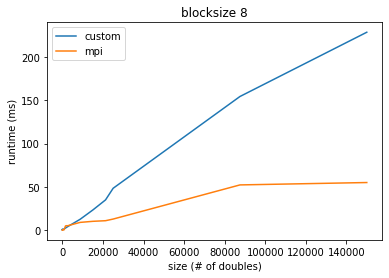

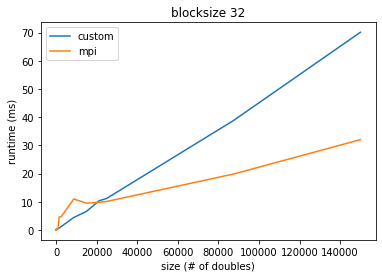

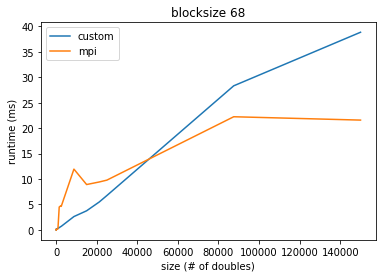

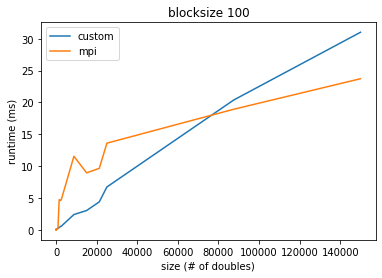

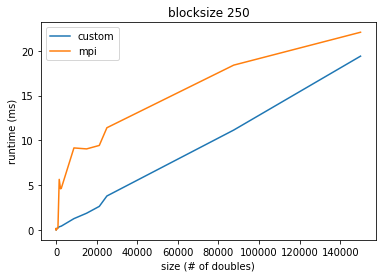

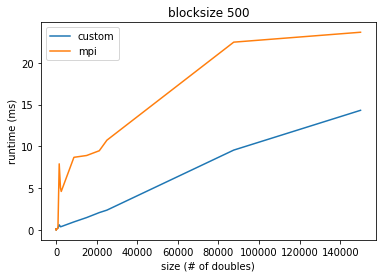

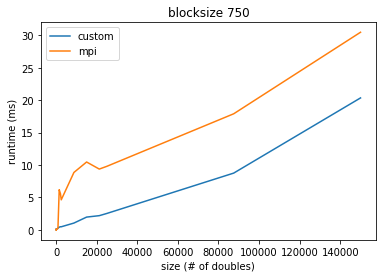

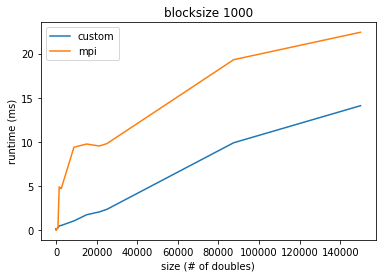

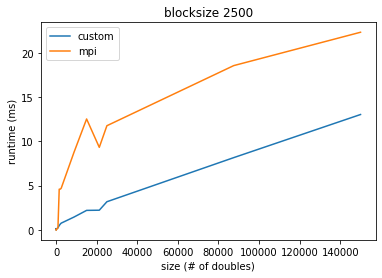

In [36]:
import pandas as pd

df = pd.read_csv("./logs/2_32x32.log", sep=';')

per_blocksize = df.groupby(df.blocksize)

for group in per_blocksize.groups:
  per_blocksize.get_group(group).plot(x='size', y=['custom', 'mpi'], title=f'blocksize {group}', xlabel='size (# of MPI_DOUBLE)', ylabel='runtime (ms)')